In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
Variable_name = [ "Town", "Country ", "Store ID", "Manager name", "Staff", "Floor Space", "Window", "Car park", "Demographic score", "Location", "40min population", "30 min population", "20 min population", "10 min population", "Store age", "Clearance space", "Competition number", "Competition score", "Performance"]

In [ ]:
Description = ["Name of town where the store is located", "Name of conuntry where the store is located", "Unique ID for the store", "Name (fictional) of the store manager", "Number of staff employed", "Floor area of the store", "window area of the store", "Does the store have a car park?", "How well does the demographic of the local population match the ideal demographic of the store? Higher is better", " Type of location for the store", "The population within each of the different drive time distances", "The age of the store in years", "How much of the store’s floor space is given over to discounted clearance stock", "How many competing stores are near the store", "A measure of quality of the competing stores High = high competition", "Good or bad. An assessment of how well the store is performing"]

In [ ]:
Data = pd.DataFrame(columns= [ "Variable_name", "Description"])

What types of classification models perform best on this dataset?
Which features are most indicative of store performance?

In [ ]:
Data[0:5]

,Variable_name,Description


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras import optimizers
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
stores_df = pd.read_csv("storedata.csv")

In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Town                136 non-null    object
 1   Country             136 non-null    object
 2   Store ID            136 non-null    int64 
 3   Manager name        136 non-null    object
 4   Staff               136 non-null    int64 
 5   Floor Space         136 non-null    int64 
 6   Window              136 non-null    int64 
 7   Car park            136 non-null    object
 8   Demographic score   136 non-null    int64 
 9   Location            136 non-null    object
 10  40min population    136 non-null    int64 
 11  30 min population   136 non-null    int64 
 12  20 min population   136 non-null    int64 
 13  10 min population   136 non-null    int64 
 14  Store age           136 non-null    int64 
 15  Clearance space     136 non-null    int64 
 16  Competition number  136 no

In [ ]:
print("Data Type of Stores variables""\n",stores_df.dtypes)
print("Shape of stores DataFrame",stores_df.shape)

Data Type of Stores variables
 Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object
Shape of stores DataFrame (136, 19)


<Axes: xlabel='Performance', ylabel='count'>

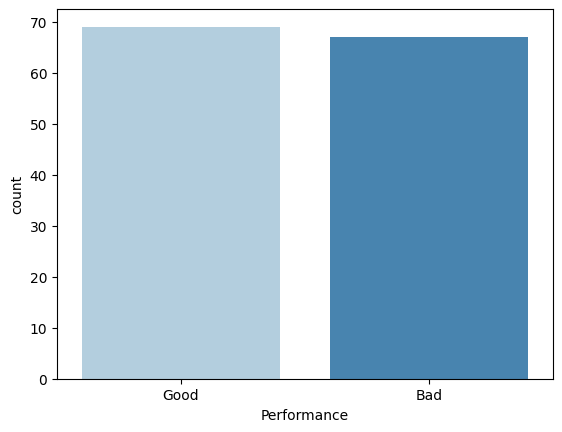

In [ ]:
sns.countplot(x="Performance", data= stores_df, palette="Blues")

The distribution of categorical valeus in the Country is : 
UK    136
Name: Country, dtype: int64
The distribution of categorical valeus in the Car park is : 
Yes    94
No     35
Y       4
N       3
Name: Car park, dtype: int64
The distribution of categorical valeus in the Location is : 
Shopping Centre    52
Retail Park        43
High Street        40
Village             1
Name: Location, dtype: int64
The distribution of categorical valeus in the Performance is : 
Good    69
Bad     67
Name: Performance, dtype: int64


<Axes: xlabel='Performance', ylabel='count'>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

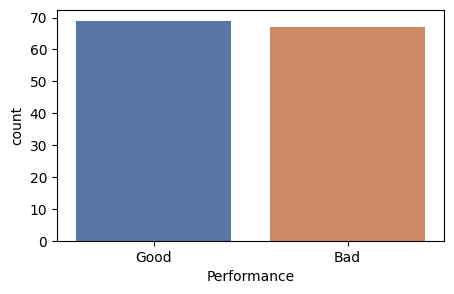

In [ ]:
var_categorical = ["Country", "Car park", "Location", "Performance"]
for col in stores_df.columns:
  if col in  var_categorical:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(stores_df[col].value_counts())
    plt.figure(figsize=(5,3))
    #sns.countplot(stores_df[col], data= stores_df, palette="deep")
sns.countplot(x="Performance", data= stores_df, palette="deep")
    #print(stores_df[col].value_counts().plot(kind="bar"))


# creating a basic histogram

In [ ]:
stores_df.hist(figsize=(15,10))

In [ ]:
plt.figure(figsize=(20,15))
for i,col in enumerate(stores_df.columns,1):
    plt.subplot(7,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(stores_df[col],kde=True)
    plt.tight_layout()
    plt.plot()

[]

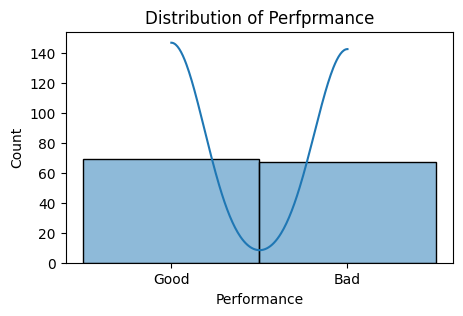

In [ ]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Perfprmance")
sns.histplot(stores_df['Performance'],kde=True)
plt.plot()

[]

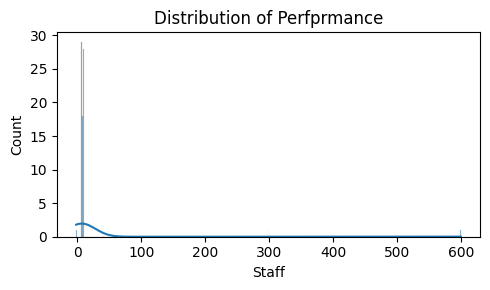

In [ ]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Perfprmance")
sns.histplot(stores_df["Staff"],kde=True)
plt.tight_layout()
plt.plot()

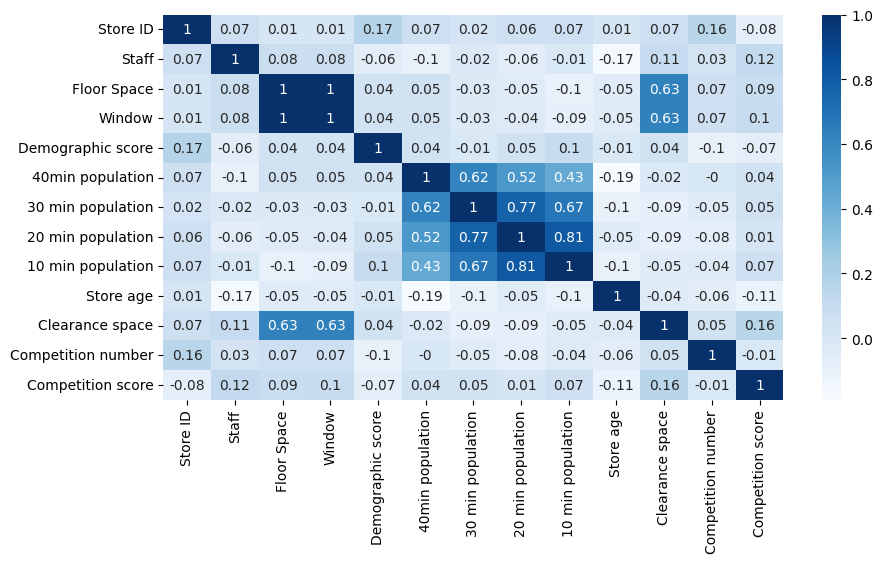

In [ ]:
plt.figure(figsize=(10,5))
cor = stores_df.corr().round(2)
#matrix = df.corr().round(2)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
plt.figure(figsize=(5,3))
stores_df["Country"].value_counts()
sns.countplot(x="Country", data= stores_df, palette="deep")

In [ ]:
stores_df['Country'] = stores_df['Country'].replace('France', 'UK')
sns.countplot(x="Country", data= stores_df, palette="deep")

<Axes: xlabel='Staff', ylabel='count'>

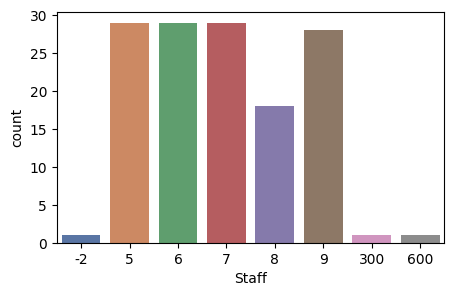

In [ ]:
plt.figure(figsize=(5,3))
stores_df["Staff"].value_counts()
sns.countplot(x="Staff", data= stores_df, palette="deep")

In [ ]:
  median = stores_df['Staff'].median()

<Axes: xlabel='Staff', ylabel='count'>

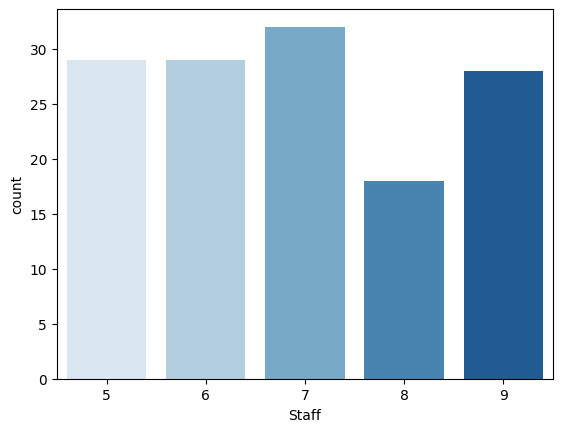

In [ ]:
stores_df['Staff'] = stores_df['Staff'].replace([-2,300, 600], median)
sns.countplot(x="Staff", data= stores_df, palette="Blues")

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x="Car park", data= stores_df, palette="deep")

<Axes: xlabel='Car park', ylabel='count'>

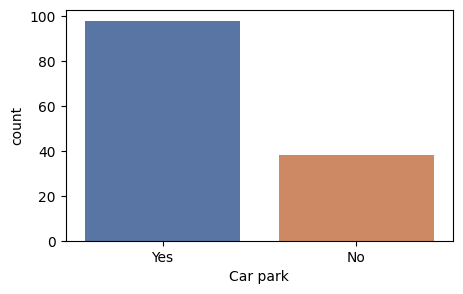

In [ ]:
plt.figure(figsize=(5,3))
stores_df["Car park"] = stores_df["Car park"].replace(['Y', 'N'], ['Yes', 'No'])
sns.countplot(x="Car park", data= stores_df, palette="deep")

<Axes: xlabel='Location', ylabel='count'>

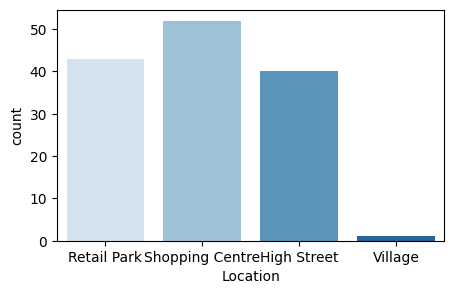

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x="Location", data= stores_df, palette="Blues")

label_encoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
var_lable = ["Town", "Car park", "Location", "Performance"]
for col in stores_df.columns:
    if col in  var_lable:
        stores_df[col] = label_encoder.fit_transform(stores_df[col])

In [ ]:
stores_df.head(3)

define the input and output

In [ ]:
X= stores_df.drop(["Performance","Town","Country","Store ID","Manager name", "Floor Space", "30 min population","20 min population", "10 min population"], axis= 'columns')
y=stores_df['Performance']

In [ ]:
X.shape

(136, 10)

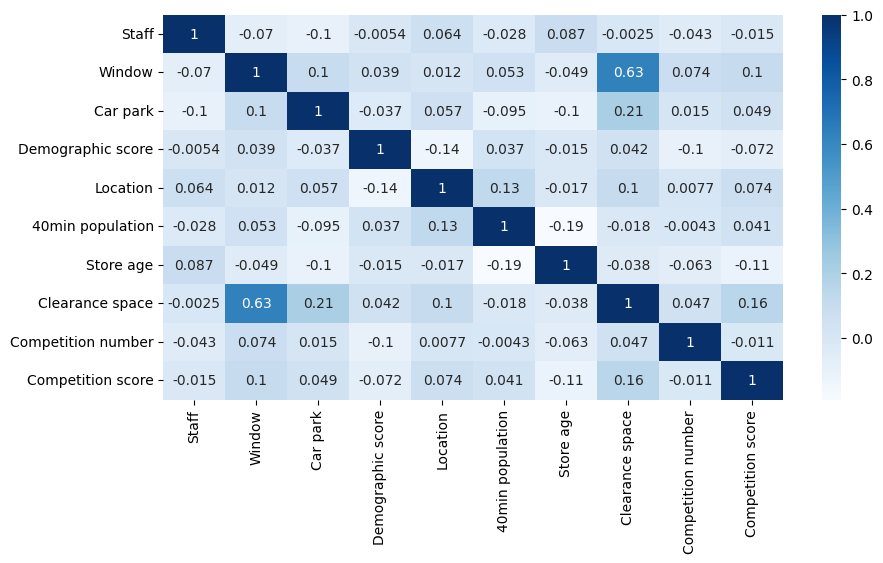

In [ ]:
plt.figure(figsize=(10,5))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
X.shape

(136, 7)

scaling

In [ ]:
continuous_var= ["Staff", "Window", "40min population", "Demographic score", "Store age", "Clearance space"]
scaler = StandardScaler()
X[var] = X[var].astype('float64')
X[var] = scaler.fit_transform(X[var].values.reshape(-1, 1))


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_new = MinMaxScaler()
continuous_var= ["Staff"]
for var in continuous_var:
  X[var] = X[var].astype('float64')
  X[var] = scaler_new.fit_transform(X[var].values.reshape(-1, 1))


In [ ]:
scaler = StandardScaler()
continuous_var= ["Staff", "40min population"]
for var in continuous_var:
  X[var] = X[var].astype('float64')
  X[var] = scaler.fit_transform(X[var].values.reshape(-1, 1))

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Staff,136.0,2.612289e-17,1.003697,-1.342293,-0.637460,0.067374,0.772207,1.477041
Window,136.0,4.571507e-17,1.003697,-1.756027,-0.771880,-0.152232,0.868365,1.743163
Car park,136.0,7.205882e-01,0.450369,0.000000,0.000000,1.000000,1.000000,1.000000
Demographic score,136.0,2.612289e-17,1.003697,-1.558199,-0.859962,0.012835,0.885632,1.583869
Location,136.0,1.102941e+00,0.836920,0.000000,0.000000,1.000000,2.000000,3.000000
40min population,136.0,1.306145e-17,1.003697,-1.635154,-0.831677,0.103637,0.747777,1.823728
Store age,136.0,2.285753e-17,1.003697,-1.614891,-0.901822,-0.188754,0.880850,1.593919
Clearance space,136.0,1.959217e-17,1.003697,-1.211370,-0.808721,-0.260537,0.578718,2.824818
Competition number,136.0,1.436759e-16,1.003697,-1.547146,-0.853861,0.186065,0.879350,1.572634
Competition score,136.0,6.857260e-17,1.003697,-1.633225,-0.614332,0.064929,1.083822,1.423453


In [ ]:
X


,Staff,Window,Car park,Demographic score,Location,40min population,Store age,Clearance space,Competition number,Competition score
0,1.477041,1.305764,1,-1.558199,1,-0.712075,-1.258357,-0.473990,0.532708,0.404560
1,0.772207,1.305764,1,-1.209080,2,-1.435415,-0.901822,2.359104,0.186065,1.423453
2,0.067374,-1.027030,0,-0.859962,1,0.387395,1.593919,-0.842680,-0.507219,1.083822
3,0.067374,0.722566,0,-0.161724,0,-1.102029,-0.545288,-0.027680,0.186065,-0.953963
4,0.067374,-1.318629,0,1.234751,1,-0.317808,0.167781,-1.211370,1.572634,-0.614332
...,...,...,...,...,...,...,...,...,...,...
131,0.067374,-0.298032,1,-0.510843,1,0.635854,-0.188754,-1.172561,1.225992,-0.274701
132,-0.637460,-1.318629,0,0.187395,2,0.609715,-0.545288,-1.153156,-0.507219,1.083822
133,0.067374,0.430966,0,1.583869,2,-0.285969,0.167781,1.524700,1.225992,1.083822
134,-0.637460,0.139367,0,0.885632,0,-0.129846,1.593919,-0.027680,-0.160577,-1.633225


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

In [ ]:
logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict= logistic_model.predict(X_test)

After preprocess the data with a scaler from sklearn.
preprocessing. fitting the classifier with the default parameters before performing the hyperparameter tuning

In [ ]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logistic_model.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_model.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_predict)))

Accuracy of logistic regression classifier on train set: 0.87
Accuracy of logistic regression classifier on test set: 0.78
Precision of logistic regression classifier on test set: 0.74


In [ ]:
X

,Staff,Window,Car park,Demographic score,Location,40min population,Store age,Clearance space,Competition number,Competition score
0,1.477041,1.305764,1,-1.558199,1,-0.712075,-1.258357,-0.473990,0.532708,0.404560
1,0.772207,1.305764,1,-1.209080,2,-1.435415,-0.901822,2.359104,0.186065,1.423453
2,0.067374,-1.027030,0,-0.859962,1,0.387395,1.593919,-0.842680,-0.507219,1.083822
3,0.067374,0.722566,0,-0.161724,0,-1.102029,-0.545288,-0.027680,0.186065,-0.953963
4,0.067374,-1.318629,0,1.234751,1,-0.317808,0.167781,-1.211370,1.572634,-0.614332
...,...,...,...,...,...,...,...,...,...,...
131,0.067374,-0.298032,1,-0.510843,1,0.635854,-0.188754,-1.172561,1.225992,-0.274701
132,-0.637460,-1.318629,0,0.187395,2,0.609715,-0.545288,-1.153156,-0.507219,1.083822
133,0.067374,0.430966,0,1.583869,2,-0.285969,0.167781,1.524700,1.225992,1.083822
134,-0.637460,0.139367,0,0.885632,0,-0.129846,1.593919,-0.027680,-0.160577,-1.633225


In [ ]:
cols = [col for col in X.columns]
print (cols)

['Staff', 'Window', 'Car park', 'Demographic score', 'Location', '40min population', 'Store age', 'Clearance space', 'Competition number', 'Competition score']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle=True)

In [ ]:
Classifier = [LogisticRegression()]

In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "cm", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in Classifier:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__


    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))


    log_entry = pd.DataFrame([[name, acc*100, ll, cm]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)

LogisticRegression
****Results****
Accuracy: 75.0000%
Log Loss: 0.5893781990245578


<ipython-input-189-10596e0540d0>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Compute confusion matrix to evaluate the accuracy of a classificatio

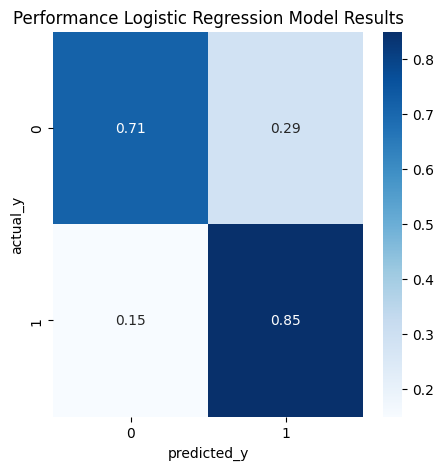

In [ ]:
cm = confusion_matrix (y_test, y_predict)

f, ax =plt.subplots(figsize=(5,5))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm,annot=True, cmap=plt.cm.Blues)
plt.xlabel("predicted_y")
plt.ylabel("actual_y")
plt.title('Performance Logistic Regression Model Results')
plt.show()

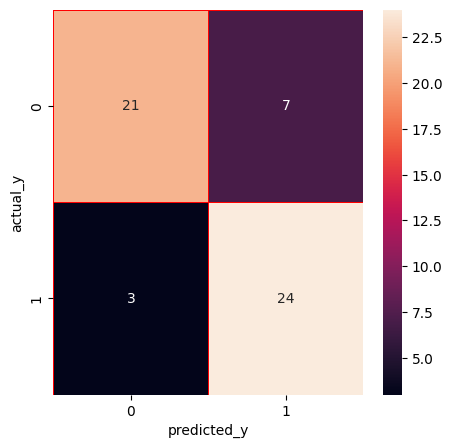

In [ ]:
cm = confusion_matrix (y_test, y_predict)

f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("predicted_y")
plt.ylabel("actual_y")
plt.show()

#

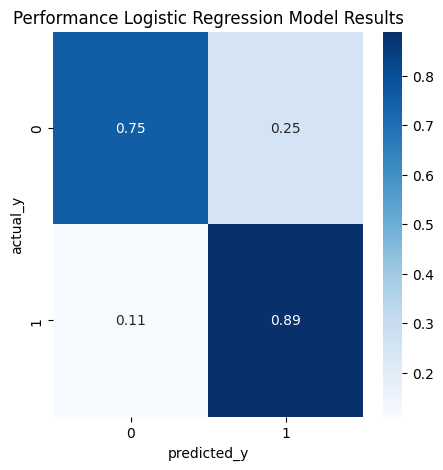

In [ ]:
cm = confusion_matrix (y_test, y_predict)

f, ax =plt.subplots(figsize=(5,5))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm,annot=True, linecolor="red", cmap= sns.color_palette("Blues", as_cmap=True))
plt.xlabel("predicted_y")
plt.ylabel("actual_y")
plt.title('Performance Logistic Regression Model Results')
plt.show()

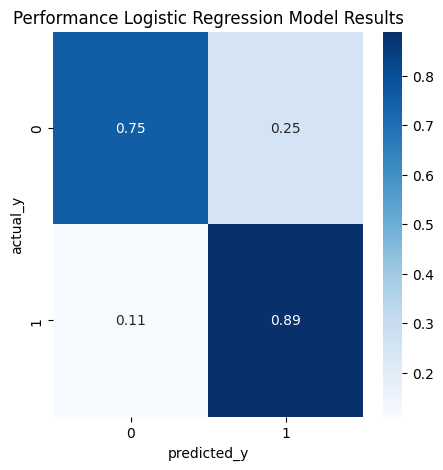

In [ ]:
cm = confusion_matrix (y_test, y_predict)

f, ax =plt.subplots(figsize=(5,5))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm,annot=True, linecolor="red", cmap= sns.color_palette("Blues", as_cmap=True))
plt.xlabel("predicted_y")
plt.ylabel("actual_y")
plt.title('Performance Logistic Regression Model Results')
plt.show()

Note: A value of 0 indicates that a store did bad performance  while a value of 1 indicates that a store did good.

The number 21 corresponds to the number of stores who were correctly predicted by the model to perform bad. The number 24 corresponds to the number of stores that the model correctly predicted to perform good.

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.77      0.89      0.83        27

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.83      0.82      0.82        55



In [ ]:
from mlxtend.plotting import plot_learning_curves

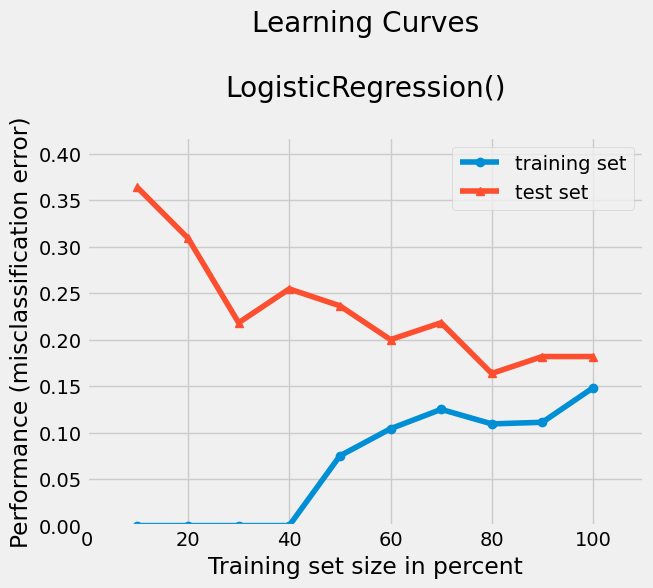

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, logistic_model)
plt.show()

As we can see from the plot above, the logistic model could  benefit from additional training data. I.e., the slope indicates that if we had a larger training set, the test set error might decrease further.
20% training set size shows that the model is overfiting (large test and test error), which is probably due to the small dataset size

Here’s how to interpret the output:

Precision: Out of all the stores that the model predicted would perform bad,  77% actually did.

Recall: Out of all the stores that actually did perform bad, the model predicted this outcome correctly for 83% of those players.
Since this value

In [ ]:
print("Feature data dimension: ", X.shape)

Feature data dimension:  (136, 7)


In [ ]:
X

,Staff,Window,Car park,Demographic score,Location,40min population,Store age
0,1.477041,1.305764,1,-1.558199,1,-0.712075,-1.258357
1,0.772207,1.305764,1,-1.209080,2,-1.435415,-0.901822
2,0.067374,-1.027030,0,-0.859962,1,0.387395,1.593919
3,0.067374,0.722566,0,-0.161724,0,-1.102029,-0.545288
4,0.067374,-1.318629,0,1.234751,1,-0.317808,0.167781
...,...,...,...,...,...,...,...
131,0.067374,-0.298032,1,-0.510843,1,0.635854,-0.188754
132,-0.637460,-1.318629,0,0.187395,2,0.609715,-0.545288
133,0.067374,0.430966,0,1.583869,2,-0.285969,0.167781
134,-0.637460,0.139367,0,0.885632,0,-0.129846,1.593919


In [ ]:
X= stores_df.drop(["Performance","Town","Country","Store ID","Manager name", "Floor Space", "30 min population","20 min population", "10 min population", "Clearance space", "Competition number", "Competition score"], axis= 'columns')
y=stores_df['Performance']

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Staff,136.0,7.836868e-17,1.003697,-1.342293,-0.637460,0.067374,0.772207,1.477041
Window,136.0,-3.657205e-16,1.003697,-1.756027,-0.771880,-0.152232,0.868365,1.743163
Car park,136.0,7.205882e-01,0.450369,0.000000,0.000000,1.000000,1.000000,1.000000
Demographic score,136.0,9.143013e-17,1.003697,-1.558199,-0.859962,0.012835,0.885632,1.583869
Location,136.0,1.102941e+00,0.836920,0.000000,0.000000,1.000000,2.000000,3.000000
40min population,136.0,1.306145e-17,1.003697,-1.635154,-0.831677,0.103637,0.747777,1.823728
Store age,136.0,4.244970e-17,1.003697,-1.614891,-0.901822,-0.188754,0.880850,1.593919


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

In [ ]:
x_train

,Staff,Window,Car park,Demographic score,Location,40min population,Store age
39,5,107,0,16,0,1171849,7
78,7,110,0,17,1,1476016,4
6,8,109,1,17,0,1323396,5
85,6,111,1,17,0,1537976,5
119,6,108,1,16,2,1145543,11
...,...,...,...,...,...,...,...
63,6,110,1,13,2,1990908,3
70,6,109,1,19,0,1888945,2
81,5,101,1,16,1,1237483,9
11,8,102,0,12,1,1514670,11


In [ ]:
# LogisticRegression model
def logisticRegressionModel(x_train, x_test, y_train, y_test):
    logistic_reg = LogisticRegression().fit(x_train, y_train)
    y_pred = logistic_reg.predict(x_test)
    #evaluate accuracy of our model
    acc = metrics.accuracy_score(y_test, y_pred)
    return acc

In [ ]:
def decisionTreeModel(x_train, x_test, y_train, y_test):
    dec_tree = DecisionTreeClassifier()
    dec_tree = dec_tree.fit(x_train, y_train)
    y_pred = dec_tree.predict(x_test)

    #evaluate model
    acc = metrics.accuracy_score(y_test, y_pred)

    return acc

In [ ]:
def printComparisonResults(logisticAccuracy,dectreeAccuracy):
    print("Printing Results")

    lr = "Logistic Regression"
    dt = "Decision Tree"

    if logisticAccuracy > dectreeAccuracy:
      print(lr, "is accurate than", dt)
    print("Done")

In [ ]:
logisticAccuracy = logisticRegressionModel(x_train, x_test, y_train, y_test)
dectreeAccuracy = decisionTreeModel(x_train, x_test, y_train, y_test)


In [ ]:
print(logisticAccuracy)

0.4878048780487805


In [ ]:
print(dectreeAccuracy)


0.6829268292682927


In [ ]:
printComparisonResults(logisticAccuracy,dectreeAccuracy)

Printing Results
Logistic Regression is accurate than Decision Tree
Done


In [ ]:
def NNTModel(x_train, x_test, y_train, y_test):
    NN_model = Sequential()
    NN_model.add(Dense(10, input_shape=(10,), activation='relu'))
    NN_model.add(Dense(10, activation='relu'))
    NN_model.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    NN_model.fit( x_train, y_train, epochs=150, batch_size=10)
    y_pred = NN_model.predict(X_test)
   # evaluate the keras model
_ accuracy = model.evaluate(X_features, y)
  print('Accuracy: %.2f' % (accuracy*100))

    return accuracy

In [ ]:
def NNTModel(X_train, X_test, y_train, y_test):
  n_features = 10
  NN_model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
  layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)),
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),

    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)),
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),

    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')])
    #NN_model.summary()
    # compile the neural network
    NN_model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
    NN_model.fit(X_train, y_train, batch_size=32, epochs=100, shuffle=True, verbose=0)
    y_pred = NN_model.predict(X_test)
    accuracy = NN_model.evaluate(y_test, y_pred)
    print('Accuracy: %.2f' % (accuracy*100))

    return accuracy

IndentationError: ignored

In [ ]:
n_features = 10
NN_model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
  layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)),
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),

    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)),
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),

    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')])
NN_model.summary()
    # compile the neural network

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# DeepNN
### layer input
inputs = layers.Input(name="input", shape=(n_features,))
### hidden layer 1
h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)
### hidden layer 2
h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu')(h1)
h2 = layers.Dropout(name="drop2", rate=0.2)(h2)
### layer output
outputs = layers.Dense(name="output", units=1, activation='sigmoid')(h2)
model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")

In [ ]:
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 10)]              0         
                                                                 
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=100, shuffle=True, verbose=0)

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 44ms/step


In [ ]:
accuracy = model.evaluate(y_test, y_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecisionTree_model=DecisionTreeClassifier()

In [ ]:
DecisionTree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict_dt= DecisionTree_model.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(DecisionTree_model.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(DecisionTree_model.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_predict_dt)))

Accuracy of logistic regression classifier on train set: 1.00
Accuracy of logistic regression classifier on test set: 0.46
Precision of logistic regression classifier on test set: 0.44


In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_predict_dt))

Accuracy:  0.4583333333333333


In [ ]:
print(classification_report(y_test, y_predict_dt))

              precision    recall  f1-score   support

           0       0.50      0.31      0.38        26
           1       0.44      0.64      0.52        22

    accuracy                           0.46        48
   macro avg       0.47      0.47      0.45        48
weighted avg       0.47      0.46      0.44        48



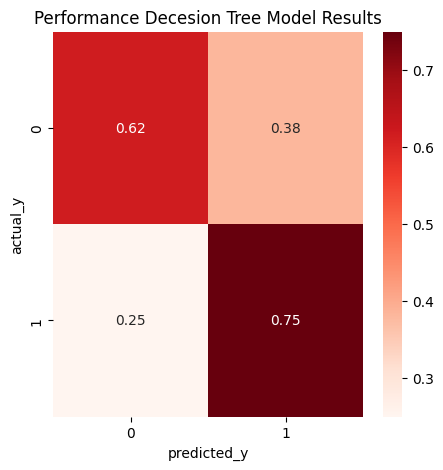

In [ ]:

cm_DT = confusion_matrix (y_test, y_predict_dt)

f, ax =plt.subplots(figsize=(5,5))
cm_DT = cm_DT.astype('float') / cm_DT.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_DT, annot=True, cmap=plt.cm.Reds)
plt.xlabel("predicted_y")
plt.ylabel("actual_y")
plt.title('Performance Decesion Tree Model Results')
plt.show()





In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from keras.layers import Activation, Dense

In [ ]:
from tensorflow.keras import models, layers, utils, backend as k

In [ ]:

NN_model = models.Sequential(name="Perceptron", layers=[
    layers.Dense(             #a fully connected layer
          name="dense",
          input_dim=10,        #with 10 features as the input
          units=1,            #and 1 node because we want 1 output
          activation='linear' #f(x)=x
    )
]))

SyntaxError: ignored

Neural Network

In [ ]:
n_features = 10
NN_model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)),
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),

    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)),
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),

    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
NN_model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
NN_model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy',F1])

In [ ]:
# train/validation
training = NN_model.fit(x=X, y=y, batch_size=32, epochs=100, shuffle=True, verbose=0, validation_split=0.3)




NameError: ignored

In [ ]:
clf.fit(X_train, y_train, epochs= 100, batch_size=10)


In [ ]:
predictions = NN_model.predict(X_test)


2/2 [==============================] - 0s 6ms/step


In [ ]:
predictions = (predictions > 0.5)*1

In [ ]:
print(predictions )

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state= 7)


In [ ]:
cvscores = []

In [ ]:
scores = NN_model.evaluate(X_test, y_test, verbose=0)


In [ ]:
          print("%s: %.2f%%" % (NN_model.metrics_names[1], scores[1]*100))
          cvscores.append(scores[1] * 100)



accuracy: 48.78%
48.78% (+/- 0.00%)


In [ ]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

48.78% (+/- 0.00%)


In [ ]:
accuracy = NN_model.evaluate((y_test, predictions)



SyntaxError: ignored

comapre the Three Model

In [ ]:
X= stores_df.drop(["Performance","Town","Country","Store ID","Manager name", "Floor Space", "30 min population","20 min population", "10 min population"], axis= 'columns')
y=stores_df['Performance']

In [ ]:
X.shape

(136, 10)

In [ ]:
X

,Staff,Window,Car park,Demographic score,Location,40min population,Store age,Clearance space,Competition number,Competition score
0,9,121,1,10,1,1288374,3,238,16,16
1,8,121,1,11,2,1086225,4,384,15,19
2,7,105,0,12,1,1595638,11,219,13,18
3,7,117,0,14,0,1179395,5,261,15,12
4,7,103,0,18,1,1398558,7,200,19,13
...,...,...,...,...,...,...,...,...,...,...
131,7,110,1,13,1,1665074,6,202,18,14
132,6,103,0,15,2,1657769,5,203,13,18
133,7,115,0,19,2,1407456,7,341,18,18
134,6,113,0,17,0,1451087,11,261,14,10


In [ ]:
continuous_var= ["Staff", "Window", "Demographic score", "40min population", "Store age", "Clearance space", "Competition number", "Competition score" ]
scaler = StandardScaler()
for var in continuous_var:
  X[var] = X[var].astype('float64')
  X[var] = scaler.fit_transform(X[var].values.reshape(-1, 1))

In [ ]:
X

,Staff,Window,Car park,Demographic score,Location,40min population,Store age,Clearance space,Competition number,Competition score
0,1.477041,1.305764,1,-1.558199,1,-0.712075,-1.258357,-0.473990,0.532708,0.404560
1,0.772207,1.305764,1,-1.209080,2,-1.435415,-0.901822,2.359104,0.186065,1.423453
2,0.067374,-1.027030,0,-0.859962,1,0.387395,1.593919,-0.842680,-0.507219,1.083822
3,0.067374,0.722566,0,-0.161724,0,-1.102029,-0.545288,-0.027680,0.186065,-0.953963
4,0.067374,-1.318629,0,1.234751,1,-0.317808,0.167781,-1.211370,1.572634,-0.614332
...,...,...,...,...,...,...,...,...,...,...
131,0.067374,-0.298032,1,-0.510843,1,0.635854,-0.188754,-1.172561,1.225992,-0.274701
132,-0.637460,-1.318629,0,0.187395,2,0.609715,-0.545288,-1.153156,-0.507219,1.083822
133,0.067374,0.430966,0,1.583869,2,-0.285969,0.167781,1.524700,1.225992,1.083822
134,-0.637460,0.139367,0,0.885632,0,-0.129846,1.593919,-0.027680,-0.160577,-1.633225


In [ ]:
x= stores_df.drop(["Performance","Town","Country","Store ID","Manager name", "Floor Space", "30 min population","20 min population", "10 min population", "Clearance space", "Competition number", "Competition score", "Window", "Demographic score", "Store age"], axis= 'columns')
y=stores_df['Performance']

In [ ]:
x.shape

(136, 4)

In [ ]:
continuous_var= ["Staff","40min population"]
scaler = StandardScaler()
for var in continuous_var:
  x[var] = x[var].astype('float64')
  x[var] = scaler.fit_transform(x[var].values.reshape(-1, 1))

In [ ]:
new_x= stores_df.drop(["Performance","Town","Country","Store ID","Manager name", "Floor Space", "30 min population","20 min population", "10 min population", "Clearance space", "Competition number", "Competition score", "40min population","Store age"], axis= 'columns')
y=stores_df['Performance']

In [ ]:
new_x

,Staff,Window,Car park,Demographic score,Location
0,9,121,1,10,1
1,8,121,1,11,2
2,7,105,0,12,1
3,7,117,0,14,0
4,7,103,0,18,1
...,...,...,...,...,...
131,7,110,1,13,1
132,6,103,0,15,2
133,7,115,0,19,2
134,6,113,0,17,0


In [ ]:
continuous_var= ["Staff","Window","Demographic score" ]
scaler = StandardScaler()
for var in continuous_var:
  new_x[var] = new_x[var].astype('float64')
  new_x[var] = scaler.fit_transform(new_x[var].values.reshape(-1, 1))

In [ ]:
new_x

,Staff,Window,Car park,Demographic score,Location
0,1.477041,1.305764,1,-1.558199,1
1,0.772207,1.305764,1,-1.209080,2
2,0.067374,-1.027030,0,-0.859962,1
3,0.067374,0.722566,0,-0.161724,0
4,0.067374,-1.318629,0,1.234751,1
...,...,...,...,...,...
131,0.067374,-0.298032,1,-0.510843,1
132,-0.637460,-1.318629,0,0.187395,2
133,0.067374,0.430966,0,1.583869,2
134,-0.637460,0.139367,0,0.885632,0


In [ ]:
new_x_train, new_x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.3, random_state=101, shuffle=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, shuffle=True)

In [ ]:
from tensorflow.keras import models, layers, utils, backend as k

In [ ]:
n_features = 10
NN_model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)),
                 activation='relu'),

    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)),
                 activation='relu'),

    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
NN_model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
NN_model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy',F1])

In [ ]:
NN_model.fit(X_train, y_train, batch_size=32, epochs=100, shuffle=True)

Epoch 1/100


NameError: ignored

In [ ]:
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
# compile the neural network
NN_model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy',F1])

In [ ]:
NN_model.fit(x=X, y=y, batch_size=32, epochs=100, shuffle=True, verbose=0, validation_split=0.3)

NameError: ignored

In [ ]:
model = models.Sequential(name="Perceptron", layers=[
    layers.Dense(             #a fully connected layer
          name="dense",
          input_dim=10,        #with 10 features as the input
          units=1,            #and 1 node because we want 1 output
          activation='sigmoid' #f(x)=x
    )
])

In [ ]:
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy',F1])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=100, shuffle=True)

Epoch 1/100


TypeError: ignored

In [ ]:
from keras.engine.sequential import Sequential
from keras.layers import Activation, Dense
model = Sequential()

In [ ]:
model.add(Dense(10, activation = 'relu', input_shape=(10,)))
model.add(Dense(10, activation = 'relu', input_shape=(10,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=4, batch_size=1)

Epoch 1/4


ValueError: ignored

In [ ]:
classifiers = [LogisticRegression(), DecisionTreeClassifier()]

In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(new_x_train, y_train)
    name = clf.__class__.__name__
    #if clf == NN_model:
      #clf.fit(X_train, y_train, epochs= 100, batch_size=10)

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(new_x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(new_x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))


    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)

NameError: ignored

In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    #if clf == NN_model:
      #clf.fit(X_train, y_train, epochs= 100, batch_size=10)

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))


    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)

NameError: ignored

In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__


    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))


    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)

LogisticRegression
****Results****
Accuracy: 78.0488%
Log Loss: 0.47325869235766804
DecisionTreeClassifier
****Results****
Accuracy: 63.4146%
Log Loss: 13.186702459433102


<ipython-input-199-b959869dc359>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-199-b959869dc359>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


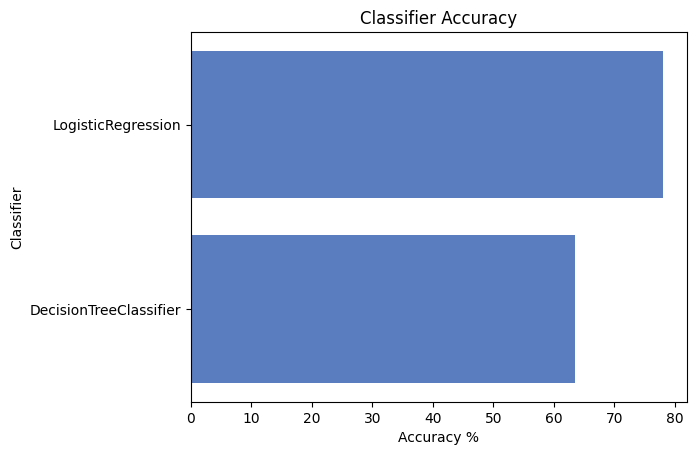

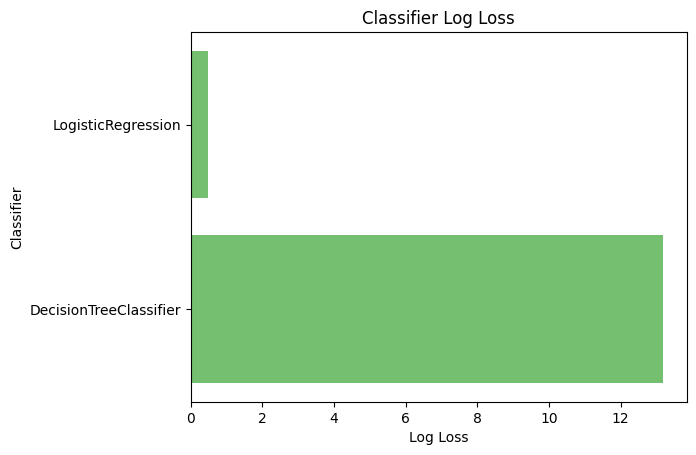

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%s : (%f)" % (feature_names[f] , importances[indices[f]]))

Feature ranking:
Staff : (0.192535)
Window : (0.162940)
Car park : (0.149181)
Demographic score : (0.131199)
Location : (0.117509)
40min population : (0.070322)
Store age : (0.069160)
Clearance space : (0.058638)
Competition number : (0.048518)
Competition score : (0.000000)


Text(0.5, 0, 'index of the feature')

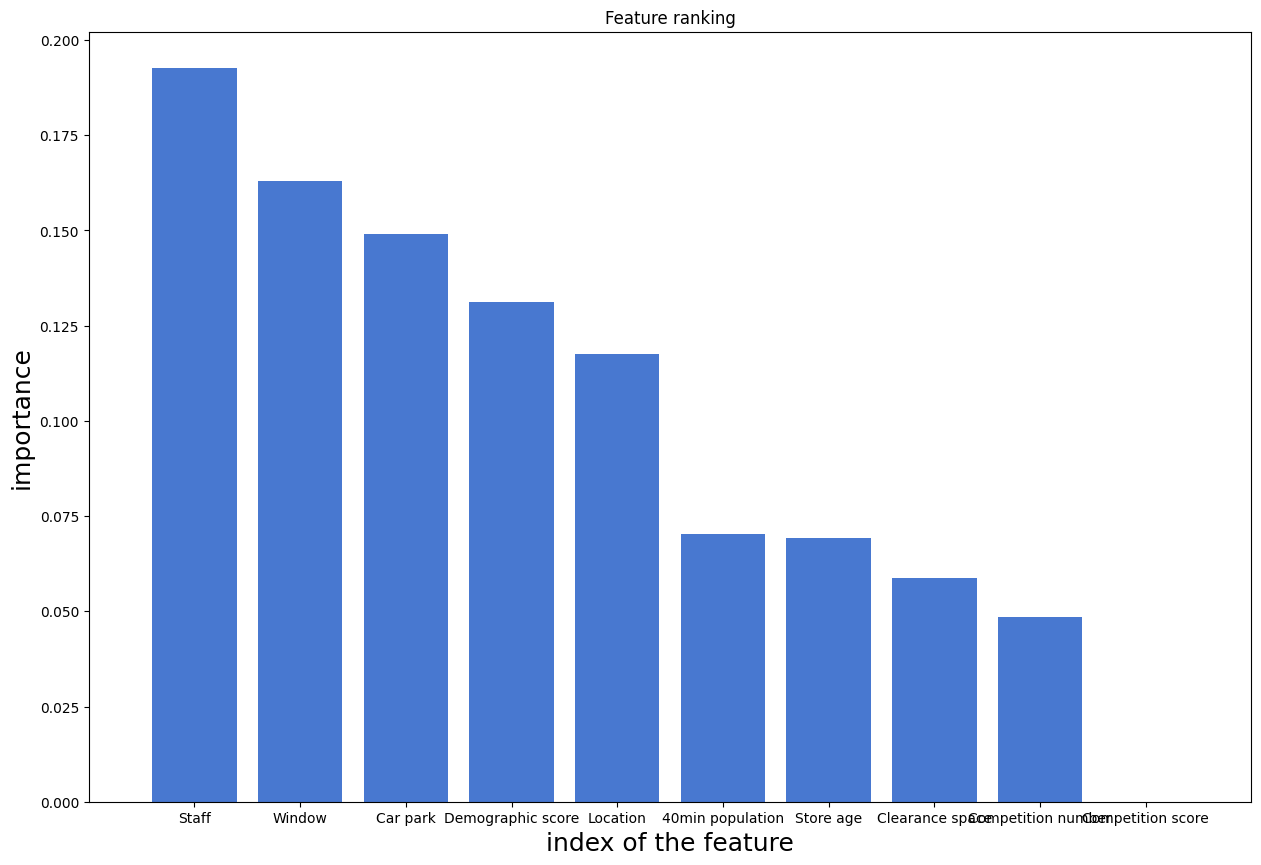

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
plt.title("Feature ranking", fontsize = 12)
plt.bar(range(X.shape[1]), importances[indices],
    color="b",
    align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

There are a lot of features with no meaning to predict the target variable performance .

In [ ]:
X_Var = [X, X_features]

In [ ]:
to reduce the number of dimensions of a machine learning model so that overfitting is prevented, and the model is easier to interpret and comprehend

**References**
https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set

https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

https://www.kaggle.com/code/davidfumo/comparing-11-classification-models


https://stackoverflow.com/questions/69052890/comparing-accuracy-of-different-classification-models-in-ml

https://stackoverflow.com/questions/14813884/correlated-features-and-classification-accuracy